<a href="https://colab.research.google.com/github/Intertangler/biostats2022/blob/main/03_distributions__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

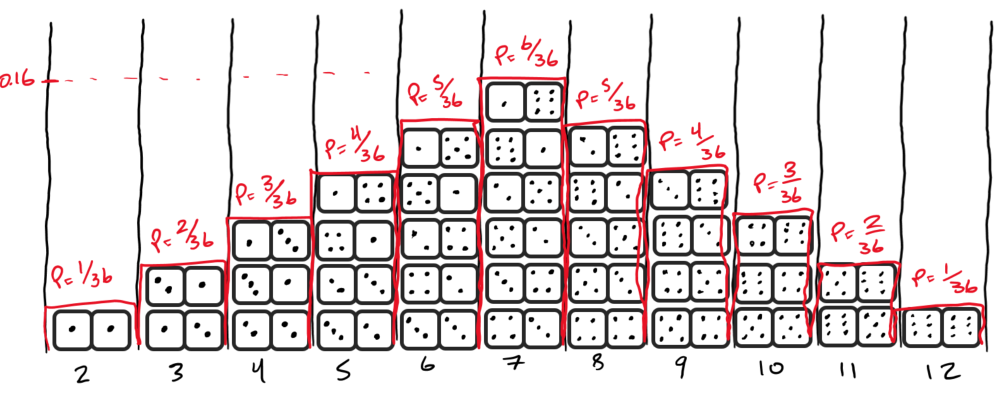

# Dice example - generating a distribution
In the example below, we show how it is possible to use a random choice function to simulate dice rolls. This enables us to perform a large number of double-roll experiments where we see which dice sums are the most likely to emerge. If we do enough experiments, (100000 for example) then we can, to high degree of accuracy, estimate the full probability distribution of the double-dice roll. 

In [ ]:
import random
import matplotlib.pyplot as plt
number_of_experiments = 100000 # we will repeat the two-dice-roll many times to sample thoroughly the possible outcomes
data_record = []
for i in range(0, number_of_experiments):
  die_result_1 = random.choice([1,2,3,4,5,6])
  die_result_2 = random.choice([1,2,3,4,5,6])
  sum_result = [die_result_1+die_result_2]
  data_record += sum_result
  
plt.hist(data_record, bins=list(range(2,14)),density=True) #density=True here normalizes the frequency data, so that the total counts sum to 1 i.e. a probability
plt.xlabel("dice result")
plt.ylabel("frequency")
plt.show()


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
number_of_experiments = 200000 # we will repeat the two-dice-roll many times to sample thoroughly the possible outcomes
data_record = np.zeros((number_of_experiments))
number_of_dice = 112
for i in range(0, number_of_experiments):
  dice_result = 0
  for die in range(0, number_of_dice):
    die_result = random.choice([1,2,3,4,5,6])
    dice_result += die_result
  data_record[i] = dice_result

plt.hist(data_record, bins="auto",density=True)
plt.xlabel("dice result")
plt.ylabel("frequency")
plt.show()

# Problem 3.1
Use the same law of large numbers approach to generate the probability distribution that we should expect from performing 133 coin tosses. I.e. the "result" of a single 133 coin-toss experiment is the total number of "successes" e.g. HEADS. It should be somewhere between 0 and 133 and some results are more likely than others. For example, there is only 1 single way to get 133 HEADS results, so this is going to be less likely than, say 100 HEADS and 33 TAILS which can come about through many ways. 
- generate a dataset of multiple simulated 133-flip experiments
- generate a histogram from that dataset using the same kind of code that we used above for the dice example

In [ ]:
experiments = 100000
data = []
flips_per_experiment = 133
### your code here ###
###
###
###


# Proximity ligation assay simulation example

Below we show how it is possible to generate a simulated distribution of nearest-neighbor distances between two types of molecules on a surface. This is similar to the probabilistic conditions that give rise to signals in proximity ligation experiments. Feel free to try running the code and play with the parameters.

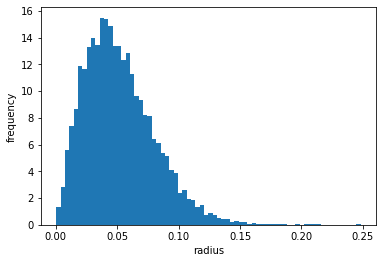

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

def generate_points(density):
  points = np.zeros((density,2))
  for i in range(0, density):
    points[i][0] = random.random()
    points[i][1] = random.random()
  return points

data_record = []
experiments = 1000
density_A = 10 # points per unit area
density_B = 100 # points per unit area

for experiment in range(experiments):

  points_A = generate_points(density_A)
  points_B = generate_points(density_B)

  for apoint in points_A:
    nearest_distance = 99
    for bpoint in points_B:
      xa = apoint[0]
      xb = bpoint[0]
      ya = apoint[1]
      yb = bpoint[1]
      dist = np.sqrt((xa-xb)**2 + (ya-yb)**2)
      if dist < nearest_distance:
        nearest_distance = dist
    data_record += [nearest_distance]

plt.hist(data_record, bins="auto",density=True)
plt.xlabel("radius")
plt.ylabel("frequency")
plt.show()  